---
title: Thermolabs
abstract: |
    Here we describe our project related to the topic of thermodynamics as devised for a renewed curriculum.
numbering: 
  headings: false
---

# Introduction

* New curriculum
* Projects in which simulations, project work and labs are central and serve as link between courses and thereby aim at conceptual development / strengthening
* Here describe thermodynamics
* expensive experiments, single setup - or engineer it
* ...


# Physics background

We here utilize the method devised by Clément and Desormes {see e.g. [ref]} which makes use of an adiabatic process where a pressured gas (**state1:** $P_1, T_1=T_{atm}$) in a cylinder with volume $V$ is suddenly released. In our case we use a fire extinguisher where the gas is released by opening the valve. As the pressure suddenly drops the temperature in the cylinder decreases as the gas is doing work. When the pressure inside the cylinder equals the atmospheric pressure (**state 2:** $P_2=P_{atm}, T_2$) we close the valve. The temperature of the gas inside the cylinder increases and hence the pressure increases until equilibrium is reached (**state 3:** $P_3, T_3=T_{atm}$), and hence the pressure increases to a value - no work is being done and here we make the assumption that the heat capacity of the cylinder is much larger than the heat capacity of the gas. The venting (state 1 $\rightarrow$ state 2) is adiabatic; the reheating (state 2 $\rightarrow$ state 3) is isochoric with heat from the vessel; overall, the vessel acts as a large reservoir returning the gas to $T_{atm}$.


The first part of the process can be described by the Poisson equations for an adiabatic process: 

$$T_{1}^\gamma P_1^{1-\gamma} = T_{2}^\gamma P_2^{1-\gamma}$$

where $\gamma$ is the specific heat ratio given by $\gamma = \frac{C_p}{C_V}$. We note that $T_{1}=T_{atm}$ and $P_2=P_{atm}$. The second part of the process can be described using Gay-Lussac's relation:

$$\frac{P_2}{T_2} = \frac{P_3}{T_3}$$

where we consider (again) that $P_2 = P_b$ and $T_3=T_{atm}$. Rearranging these equations (see Appendix) yields:

$$\gamma = \frac{\ln{P_1}-\ln{P_b}}{\ln{P_1}-\ln{P_3}}$$ (eq:final)










# Methods & Materials
We use an 'old' fire $2 \mathrm{L}$ fire extinguisher as vessel and a an Arduino MKR Zero with onboard sd-card module as data logger, see {numref}'fig_experimental_setup_1'. An [Adafruit MPL3115A2](https://www.adafruit.com/product/1893) is used to measure both temperature and pressure. The sensor is able to detect small pressure changes (+/- 0.05kPa) but is limited in range. We repeat the measurements with the XXX sensor which allows to measure at higher pressures. 

The sensor and a LiPo battery are mounted to the Arduino. The entire instrument was then mounted on a regular pvc-tube which is in return mounted on the valve.

```{figure} Figuren/setup.jpg
:width: 50%
:name: fig_experimental_setup_1

placeholder for device
```

To ensure that minimal water vapor is present in the vessel, we blow nitrogen gas into the vessel before closing it. Interval... 
To obtain proper results, we waited half an hour before filling the vessel with nitrogen gas up to a pressure of $~1400 \mathrm{hPa}$. Again, for the best results, we waited half an hour before opening the valve. After $~2\mathrm{s}$ the pressure inside the vessel reaches atmospheric pressure. We kept recording pressure and temperature for half an hour. 

Using equation {numref}`eq:final` we calculate the specific heat ratio. 

```{figure} Figuren/arduino_logger.png
:width: 50%
:name: fig_experimental_logger

Arduino as logger
```

# Results

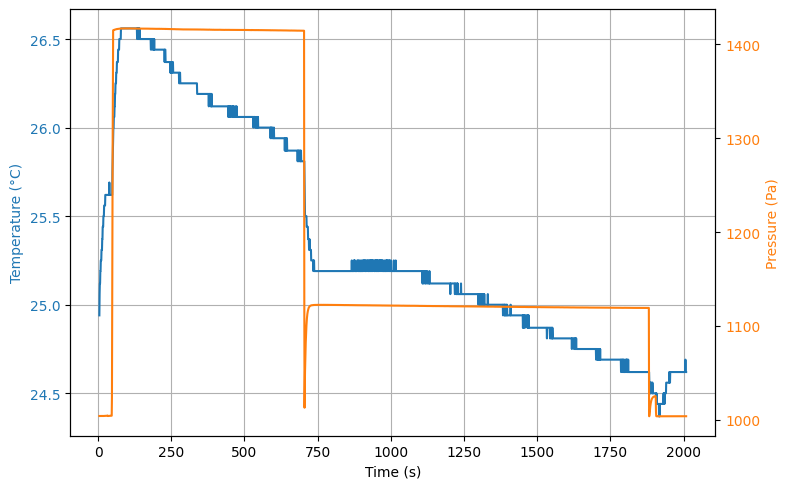

In [1]:
# # Metingen aan brandblusser prototype

# - meting thermoblus is tweede test
# - meting TEMP005 is een zeer lange meting
# - N2 is meting waarbij we gevuld hebben met stikstof


import numpy as np
import matplotlib.pyplot as plt

#data = np.loadtxt('meting thermoblus.csv', delimiter=',', skiprows=1)
#data = np.loadtxt('TEMP005.csv', delimiter=',', skiprows=1)
#data = np.loadtxt('N2.csv', delimiter=',', skiprows=1) # vullen met stikstof
data = np.loadtxt('TEMP005.csv', delimiter=',', skiprows=1) # lange meting

t = data[:,0]*1e-3
temp = data[:,1]
pressure = data[:,2]

fig, ax1 = plt.subplots(figsize=(8, 5))
#plt.title('Temperature and Pressure vs Time')

color_temp = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)', color=color_temp)
ax1.plot(t, temp, color=color_temp, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid()

ax2 = ax1.twinx()
color_pressure = 'tab:orange'
ax2.set_ylabel('Pressure (Pa)', color=color_pressure)
ax2.plot(t, pressure, color=color_pressure, label='Pressure (hPa)')
ax2.tick_params(axis='y', labelcolor=color_pressure)

fig.tight_layout()

plt.savefig('../Figuren/temperature_pressure_plot.svg')
plt.savefig('../Figuren/temperature_pressure_plot.png',dpi=450)
plt.show()

In [6]:
# # Metingen aan brandblusser prototype

# - meting thermoblus is tweede test
# - meting TEMP005 is een zeer lange meting
# - N2 is meting waarbij we gevuld hebben met stikstof


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets


#data = np.loadtxt('meting thermoblus.csv', delimiter=',', skiprows=1)
#data = np.loadtxt('TEMP005.csv', delimiter=',', skiprows=1)
#data = np.loadtxt('N2.csv', delimiter=',', skiprows=1)
data = np.loadtxt('TEMP005.csv', delimiter=',', skiprows=1) # lange meting
t = data[:,0]*1e-3
temp = data[:,1]
pressure = data[:,2]

def update(t_c):
    plt.clf()
    fig, ax1 = plt.subplots(figsize=(8, 5))
    #plt.title('Temperature and Pressure vs Time')

    color_temp = 'tab:blue'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Temperature (°C)', color=color_temp)

    ax1.plot(t, temp, color=color_temp, label='Temperature (°C)')
    ax1.plot(t[t_c], temp[t_c], 'ro')  # Highlight the selected time
    ax1.tick_params(axis='y', labelcolor=color_temp)

    ax1.set_ylim([min(temp)-2, max(temp)+2])
    ax1.grid()

    ax2 = ax1.twinx()
    color_pressure = 'tab:orange'
    ax2.set_ylabel('Pressure (Pa)', color=color_pressure)
    ax2.plot(t, pressure, color=color_pressure, label='Pressure (hPa)')
    ax2.plot(t[t_c], pressure[t_c], 'ro')  # Highlight the selected time
    ax2.tick_params(axis='y', labelcolor=color_pressure)

    ax2.text(0.5, 0.9, f'Time: {t[t_c]:.2f} s\nTemp: {temp[t_c]:.2f} °C\nPressure: {pressure[t_c]:.2f} hPa',
             transform=ax2.transAxes, fontsize=10, verticalalignment='top')
    fig.tight_layout()
    
    plt.show()

interact(update, t_c=widgets.IntSlider(min=0, max=len(t)-1, step=1, value=len(t)//2))

interactive(children=(IntSlider(value=1236, description='t_c', max=2471), Output()), _dom_classes=('widget-int…

<function __main__.update(t_c)>

{numref}`TP_plot` shows the entire thermodynamic process, including the filling of the cylinder at $t = \mathrm{s}$. We note here that due to compression of the gas the temperature increases. Given the educational context, this is a surplus for students to see.

At $t = \mathrm{s}$ the valve is opened and the pressure drops in $ \mathrm{s}$ from $p_1 = \mathrm{hPa}$ to $p_2 = \mathrm{hPa}$. The expected temperature decrease is observed as well ($\Delta T = \mathrm{\degree C}$). Once the valve is closed again, we see the pressure in the vessel increases quickly to a maximum of $p_3 = \mathrm{hPa}$.

```{figure} ../Figuren/temperature_pressure_plot.*
:width: 100%
:name: TP_plot

pressure and temperature as function of time
```

In [4]:
P_1 = max(pressure)
P_b = min(pressure)
P_2 = np.mean(pressure[np.where((t > 1500) & (t < 1750))])

def calculate_gamma(P_1, P_b, P_2):
    gamma = (np.log(P_1) - np.log(P_b))/(np.log(P_1) - np.log(P_2))
    return gamma

gamma = calculate_gamma(P_1, P_b, P_2)
print(gamma)

g_1 = (calculate_gamma(P_1+5, P_b, P_2) - calculate_gamma(P_1-5, P_b, P_2))/2
g_2 = (calculate_gamma(P_1, P_b+5, P_2) - calculate_gamma(P_1, P_b-5, P_2))/2
g_3 = (calculate_gamma(P_1, P_b, P_2+5) - calculate_gamma(P_1, P_b, P_2-5))/2

error_gamma = np.sqrt(g_1**2 + g_2**2 + g_3**2)
print(error_gamma)



1.4645773337215904
0.035605767159031285


Using equation {numref}`eq:final` we find a value for the specific heat ratio of $1.45 \pm X$ where the literature value is known to be ... . 


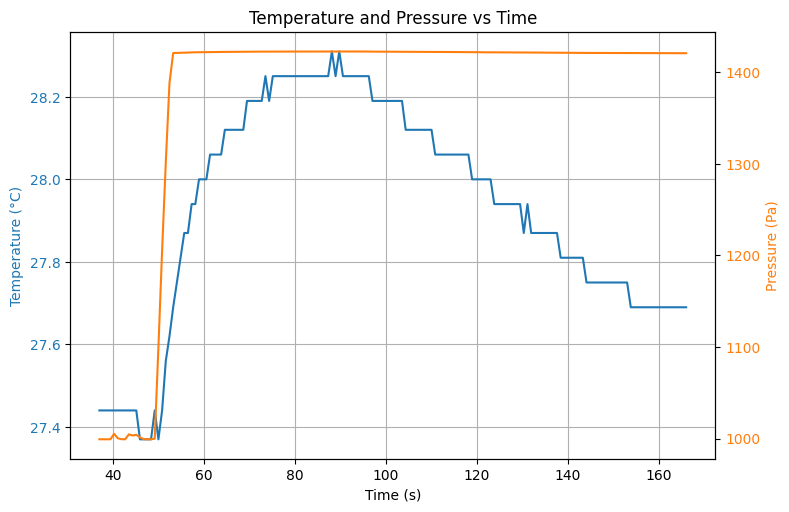

In [3]:
# Vullen
low_t = 40
high_t = 200

fig, ax1 = plt.subplots(figsize=(8, 5))

color_temp = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)', color=color_temp)
ax1.plot(t[low_t:high_t], temp[low_t:high_t], color=color_temp, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid()

ax2 = ax1.twinx()
color_pressure = 'tab:orange'
ax2.set_ylabel('Pressure (Pa)', color=color_pressure)
ax2.plot(t[low_t:high_t], pressure[low_t:high_t], color=color_pressure, label='Pressure (Pa)')
ax2.tick_params(axis='y', labelcolor=color_pressure)

fig.tight_layout()
plt.title('Temperature and Pressure vs Time')
plt.show()

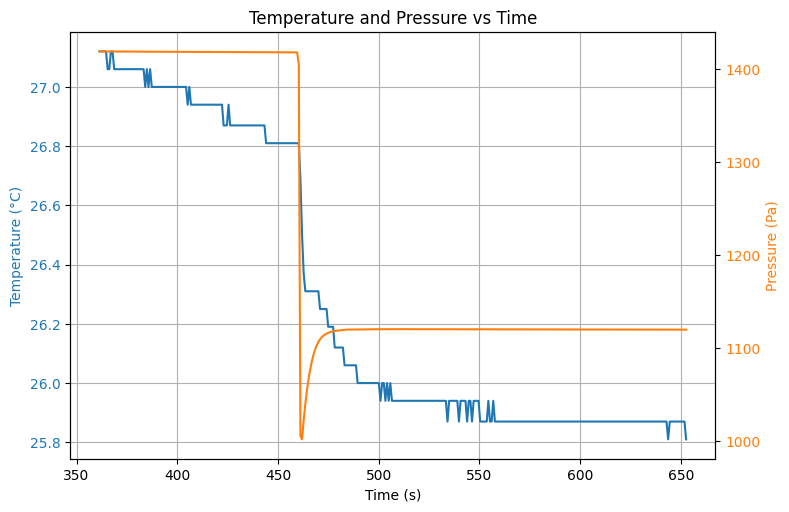

In [4]:
# Leeg lopen
low_t = 440
high_t = 800

fig, ax1 = plt.subplots(figsize=(8, 5))

color_temp = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)', color=color_temp)
ax1.plot(t[low_t:high_t], temp[low_t:high_t], color=color_temp, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid()

ax2 = ax1.twinx()
color_pressure = 'tab:orange'
ax2.set_ylabel('Pressure (Pa)', color=color_pressure)
ax2.plot(t[low_t:high_t], pressure[low_t:high_t], color=color_pressure, label='Pressure (Pa)')
ax2.tick_params(axis='y', labelcolor=color_pressure)

fig.tight_layout()
plt.title('Temperature and Pressure vs Time')
plt.show()

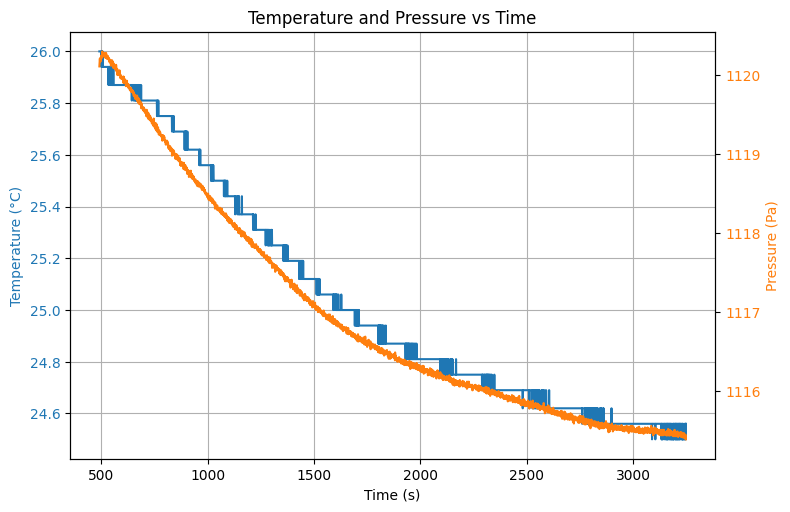

In [5]:
# Naar eindtemperatuur
low_t = 600
high_t = 4000

fig, ax1 = plt.subplots(figsize=(8, 5))

color_temp = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (°C)', color=color_temp)
ax1.plot(t[low_t:high_t], temp[low_t:high_t], color=color_temp, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid()

ax2 = ax1.twinx()
color_pressure = 'tab:orange'
ax2.set_ylabel('Pressure (Pa)', color=color_pressure)
ax2.plot(t[low_t:high_t], pressure[low_t:high_t], color=color_pressure, label='Pressure (Pa)')
ax2.tick_params(axis='y', labelcolor=color_pressure)

fig.tight_layout()
plt.title('Temperature and Pressure vs Time')
plt.show()

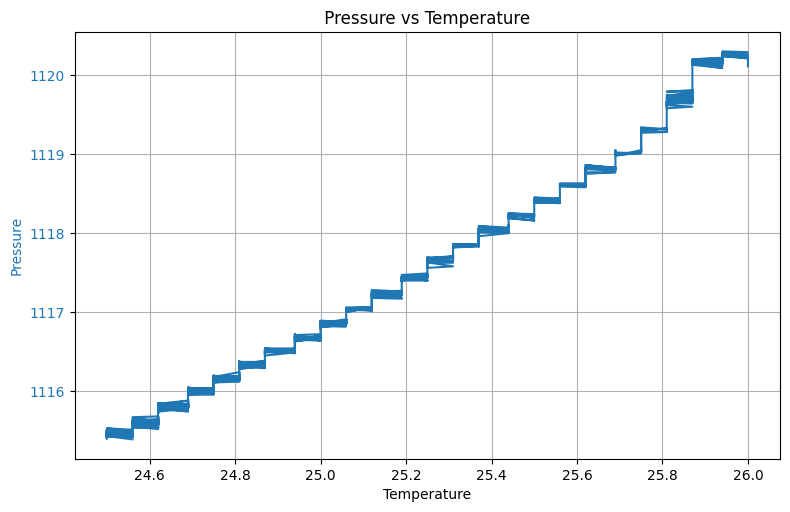

In [11]:
# Naar eindtemperatuur
low_t = 600
high_t = 4000

fig, ax1 = plt.subplots(figsize=(8, 5))

color_temp = 'tab:blue'
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Pressure', color=color_temp)
ax1.plot(temp[low_t:high_t], pressure[low_t:high_t], color=color_temp, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid()


fig.tight_layout()
plt.title(' Pressure vs Temperature ') 
plt.show()

# Discussion & Conclusion
Our aim was to devise a cheap (scalable) but accurate experiment in the topic of thermodynamics. Determining the specific heat ratio using the valve of a fire entinguisher and an arduino as logger ...
more process than expected (filling)




# Appendix

## Setup and assumptions

* Ideal gas in a rigid vessel of volume $V$.
* State (1): initial equilibrium at $(P_1,\,T_{atm})$.
* Rapid vent to atmosphere (no heat exchange during the short release) to State (2): pressure equals barometric pressure $P_b\equiv P_{atm}$, temperature drops to $T_2$.
* Valve is then closed; gas reheats **at constant volume** (no work) back to $T_{atm}$, reaching State (3): pressure $P_2$.
* The quick release (1)$\to$(2) is adiabatic; the recovery (2)$\to$(3) is isochoric.

## Step 1 — Adiabatic release (1)$\to$(2)

For a reversible adiabatic process of an ideal gas,

$$
T^\gamma P^{1-\gamma}=\text{const}.
$$

Thus,

$$
T_{1}^{\gamma} P_{1}^{\,1-\gamma}
=
T_{2}^{\gamma} P_{b}^{\,1-\gamma},
\qquad (T_1=T_{atm}).
\tag{A1}
$$

## Step 2 — Isochoric reheat (2)$\to$(3)

At constant $V$, $P/T=\text{const}$. Hence,

$$
\frac{P_b}{T_2}=\frac{P_2}{T_{atm}}
\;\Rightarrow\;
T_2=T_{atm}\,\frac{P_b}{P_2}=T_1\,\frac{P_b}{P_2}.
\tag{A2}
$$

## Step 3 — Eliminate $T_2$ and solve for $\gamma$

Insert (A2) into (A1) and cancel $T_1^\gamma$:

$$
P_{1}^{\,1-\gamma}
=
\left(\frac{P_b}{P_2}\right)^{\gamma} P_b^{\,1-\gamma}
=
P_b\,P_2^{-\gamma}.
$$

Take natural logs and rearrange:

$$
(1-\gamma)\ln P_1=\ln P_b-\gamma\ln P_2
$$

$$
\Rightarrow\quad
\gamma(\ln P_1-\ln P_2)=\ln P_1-\ln P_b
$$

$$
\Rightarrow\quad
\boxed{\displaystyle
\gamma=\frac{\ln P_1-\ln P_b}{\ln P_1-\ln P_2}}.
$$

This matches the expression quoted in the main text, with $P_b=P_{atm}$.
